### Visualize iceberg trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.path as mpath
import glob

#### Functions

In [20]:
def prepare_plot(figsize=(12, 12)):
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    ax.coastlines(); 
    gl = ax.gridlines(draw_labels=True, ylocs=[]);#, color='w', lw=2);
    return fig, ax

#### Load files

In [3]:
run_dir   = '/home/users/birgal/data/NEMO-test-20230926-icebergs/'
flist_icb = np.sort(glob.glob(f'{run_dir}trajectory_icebergs_*'))

In [4]:
icebergs = xr.open_dataset(flist_icb[0])

# Read in iceberg trajectory files from all of the processors:
for f, file in enumerate(flist_icb):
    try:
        if not xr.open_dataset(file)['iceberg_number']: 
            # if file has no icebergs, go to next file
            continue
    except:
        # if file has an iceberg, append to dataset along dimension 'n'
        icebergs = xr.concat([icebergs, xr.open_dataset(file)], dim='n')

In [5]:
# Number of unique icebergs: (currently they are all unique)
iceberg_numbers = np.unique(icebergs['iceberg_number'][:,0])

#### Visualize

In [6]:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

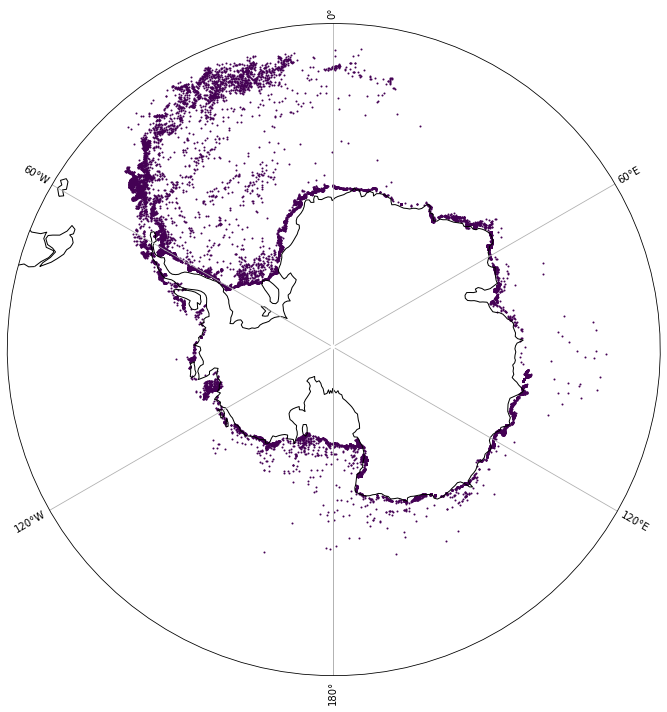

In [26]:
fig, ax = prepare_plot()
for num in iceberg_numbers:
    ax.scatter(icebergs['lon'][icebergs['iceberg_number'][:,0]==num], 
               icebergs['lat'][icebergs['iceberg_number'][:,0]==num], 
               c=icebergs['year'][icebergs['iceberg_number'][:,0]==num], s=1, transform=ccrs.PlateCarree())